# Projet Capstone de Data Science

## Présentation

Si vous envisagez de sortir voir un film, dans quelle mesure pouvez-vous faire confiance aux critiques et aux évaluations en ligne ?

*Surtout* si l'entreprise affichant la note gagne *aussi* de l'argent en vendant des billets de cinéma.

Est-ce que l'entreprise a tendance à sur-évaluer les films avec de meilleures notes que celles qu'ils devraient obtenir ?



# Partie 1 : Comprendre le contexte et les données
### les données

Ce sont les données derrière l'histoire de l'article [Be Suspicious Of Online Movie Ratings, en particulier Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/) disponible publiquement sur : https://github.com/fivethirtyeight/data.

Il existe deux fichiers csv, l'un avec les Stars (étoiles) et les Ratings (notes) affichés sur Fandango, et l'autre avec des données agrégées pour les notations/évaluations de films d'autres sites, tels que Metacritic, IMDB et Rotten Tomatoes.

#### all_sites_scores.csv

`all_sites_scores.csv` contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

#### fandango_scape.csv

`fandango_scrape.csv` contient tous les films de l'article 538 tirés de Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## importation des librairies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# Partie 2 : Exploration des scores affichés par Fandango par rapport aux évaluations des utilisateurs réels

## Lire le dataset

In [4]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Explorons la relation entre la popularité d'un film et son classement.
## Nuage de points montrant la relation entre les notes et les votes.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

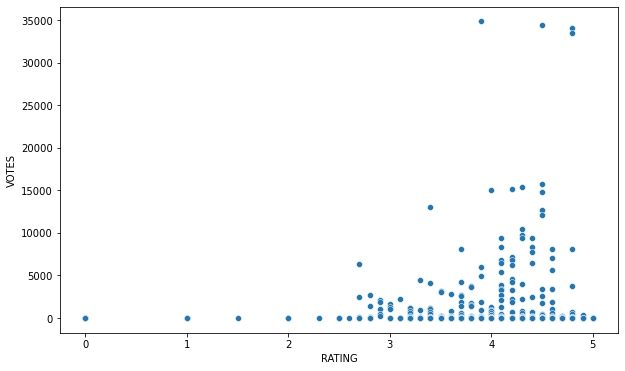

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='RATING', y='VOTES', data=fandango)

## Correlation entre les Facteurs 

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


##  Combien de films y a-t-il par année dans le DataFrame Fandango ?**

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x.split(' ')[-1][1:-1])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [11]:
fandango.groupby('YEAR').count()['FILM']

YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

##  Visualisation du nombre de films par an avec un graphique :**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


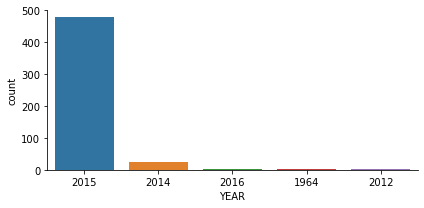

In [12]:

g = sns.catplot("YEAR", data=fandango, aspect=2,kind='count',height=3)
g.set_xticklabels(step=1)

## Les 10 films ayant obtenu le plus grand nombre de votes 

In [13]:
fandango.sort_values('VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


## Combien de films n'ont aucun avis/vote ?

In [80]:
fandango[fandango['VOTES'] == 0].count()['FILM']

69

## On supprime  les films sans avis

In [81]:
df = fandango[fandango['VOTES'] != 0]

In [82]:
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


## Comme indiqué dans l'article, en raison de l'affichage HTML et du classement par étoiles, la note réelle de l'utilisateur peut être légèrement différente de celle affichée à un utilisateur. Visualisons cette différence avec des distributions


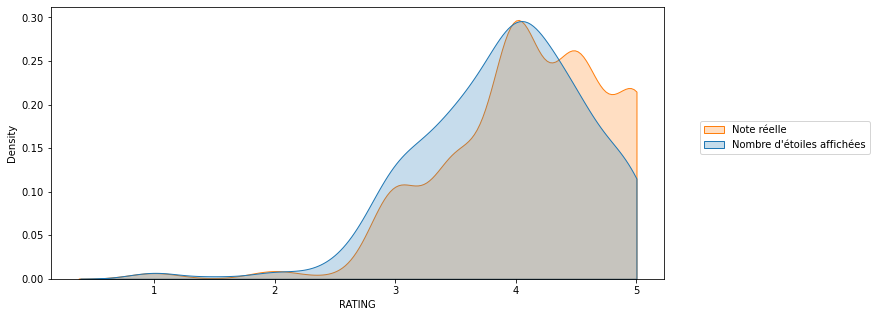

In [83]:
df1 = pd.concat([df['RATING'],df['STARS']], axis=1)
plt.figure(figsize=(11,5))
ax = sns.kdeplot(data=df1,shade=True,clip=(0,5))
plt.legend(labels=['Note réelle','Nombre d\'étoiles affichées'], fontsize='x-large', frameon=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05 , .6))

plt.xlabel('RATING')
plt.show()


## Quantifions maintenant cet écart.

In [84]:
df['STARS_DIFF'] = round(df['STARS'] - df['RATING'],2)

C:\Users\HPG5~1\AppData\Local\Temp/ipykernel_7584/87398547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS_DIFF'] = round(df['STARS'] - df['RATING'],2)


In [85]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


## Diagramme de comptage (countplot) pour afficher le nombre de fois qu'une certaine différence se produit

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

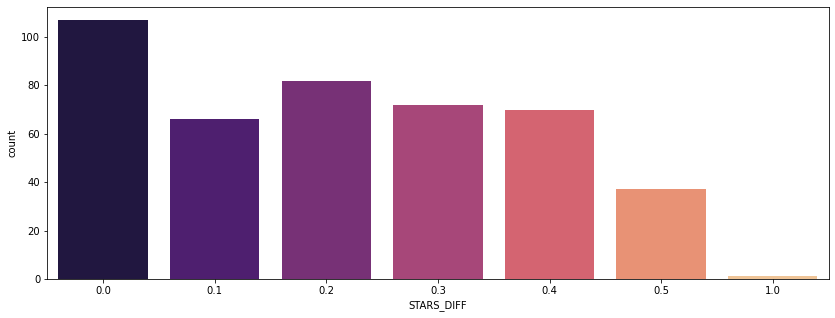

In [86]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='STARS_DIFF', palette='magma')

## Nous pouvons voir sur le diagramme précédent qu'un film affichait une différence d'une étoile par rapport à sa véritable note ! Quel film a eu ce différentiel proche d'une étoile ?

In [87]:
df.loc[df['STARS_DIFF'] == 1.0,['FILM','STARS_DIFF']]

,FILM,STARS_DIFF
381,Turbo Kid (2015),1.0


# Partie 3 : Comparaison des évaluations de Fandango avec d'autres plateformes
Comparons maintenant les scores de Fandango à d'autres sites d'évaluation de films et voyons comment ils se comparent.


In [88]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [90]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [91]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [92]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

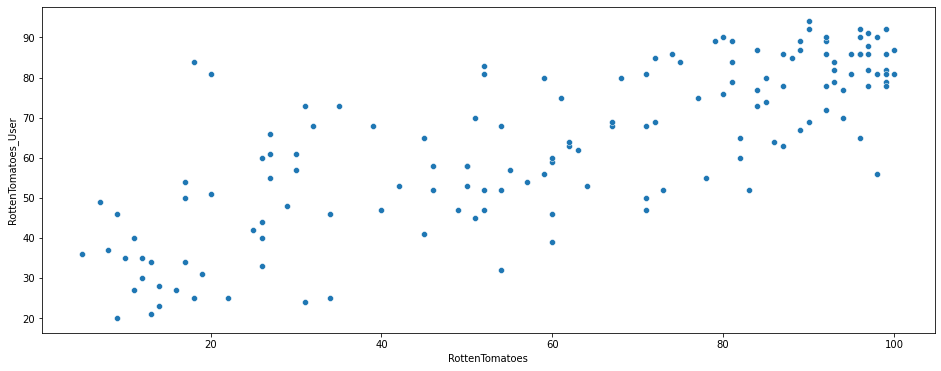

In [99]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User.

Remarque : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques

In [135]:
all_sites['Rotten_Diff'] = round(all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'],3)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Comparons maintenant la différence moyenne globale. Puisque nous avons affaire à des différences qui peuvent être négatives ou positives, prenez d'abord la valeur absolue de toutes les différences, puis prenez la moyenne. Cela retournera la moyenne des valeurs absolues de la différence entre la note des critiques et la note des utilisateurs.

## La différence absolue moyenne entre les notes RT et les notes des utilisateurs RT comme décrit ci-dessus.

In [141]:
all_sites['Rotten_Diff'].apply(lambda x:abs(x)).mean()

15.095890410958905

##  La distribution des différences entre la note des critiques RT et la note des utilisateurs RT. 

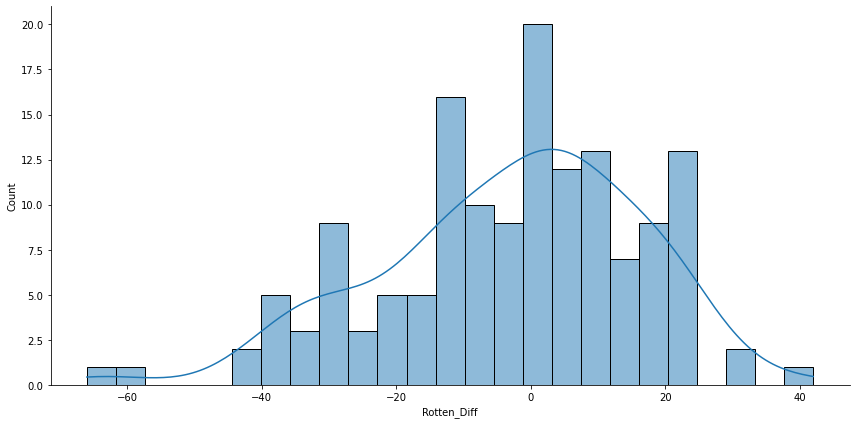

In [156]:

sns.displot( x='Rotten_Diff',data=all_sites, kde=True, height=6, aspect=2, bins=25)

 ## une distribution montrant la *valeur absolue* de la différence des notes entre les critiques et les utilisateurs sur Rotten Tomatoes

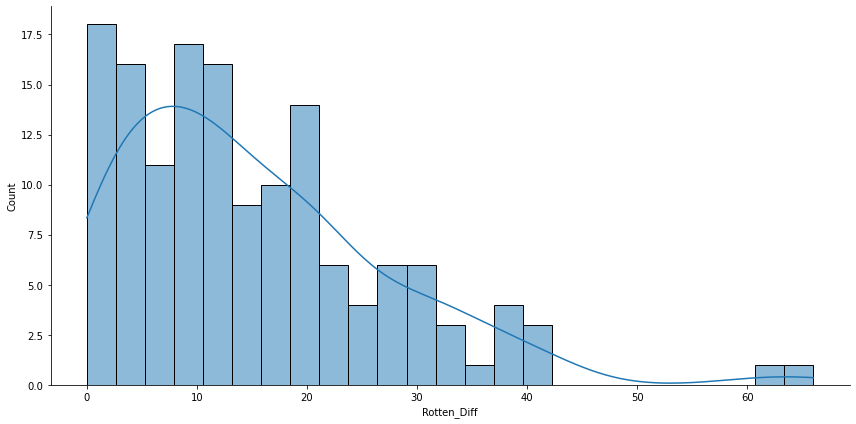

In [157]:

sns.displot( x=all_sites['Rotten_Diff'].apply(lambda x:abs(x)),data=all_sites, kde=True, height=6, aspect=2, bins=25)

## Voyons quels films sont à l'origine des différences les plus importantes.
le top 5 des films qui ont obtenu une note moyenne des utilisateurs supérieure à celle des critiques 

In [182]:
all_sites.sort_values(by=['Rotten_Diff'], ascending=True).head(5).loc[:,['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


maintenant le top 5 des films qui ont obtenu une note moyenne des critiques supérieure à celle des utilisateurs.**

In [183]:
all_sites.sort_values(by=['Rotten_Diff'], ascending=False).head(5).loc[:,['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


### MetaCritic

Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

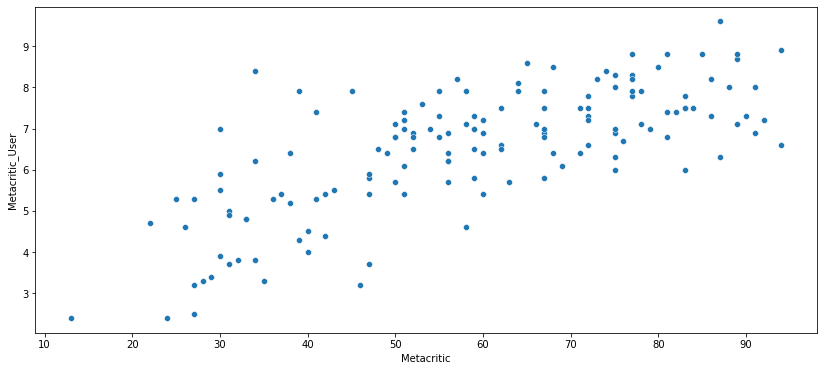

In [184]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Metacritic', y='Metacritic_User',data=all_sites)

### IMDb

Enfin, explorons IMDb. Notez que Metacritic et IMDb offrent le nombre de votes. Analysons les films les plus populaires.



In [186]:
all_sites.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

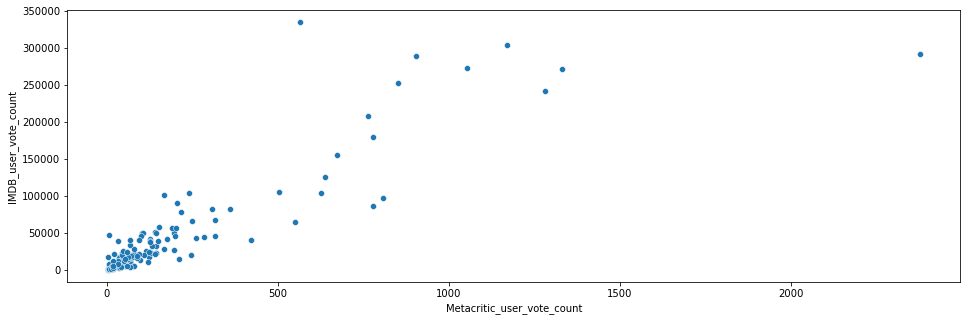

In [187]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites)

## Notez qu'il y a deux valeurs aberrantes (outliers) ici. Le film ayant obtenu le plus grand nombre de votes sur IMDb n'a qu'environ 500 notes MetaCritic. Quel est ce film ?**


In [192]:
all_sites.sort_values(by=['IMDB_user_vote_count'], ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


 ## Quel film a le plus grand nombre de votes des utilisateurs MetaCritic ?

In [193]:
all_sites.sort_values(by=['Metacritic_user_vote_count'], ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Notes Fandago vs. Autres Plateformes

Pour finir, commençons à examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

In [198]:
df = pd.merge(fandango,all_sites, how='inner', on='FILM')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  RT_Norm                     145 non

### Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

Notez que RT, MetaCritic et IMDb n'utilisent pas un score (note) compris entre 0 et 5 étoiles comme le fait Fandango. Pour faire une comparaison équitable, nous devons *normaliser* ces valeurs afin qu'elles se situent toutes entre 0 et 5 étoiles et que la relation entre les avis reste la même.

In [233]:
df['RT_Norm'] = df['RottenTomatoes'].apply(lambda x: round(x/20,2))

In [234]:
df['RTU_Norm'] = df['RottenTomatoes_User'].apply(lambda x: round(x/20,2))

In [235]:
df['Meta_Norm'] = df['Metacritic'].apply(lambda x: round(x/20,2))

In [236]:
df['MetaU_Norm'] = df['Metacritic_User'].apply(lambda x: round(x/20,2))

In [238]:
df['IMDB_Norm'] = df['IMDB'].apply(lambda x: round(x/20,2))
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,0.16,0.21
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,0.35,0.36
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.60,4.25,3.60,0.33,0.37
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.05,4.20,3.35,0.34,0.37
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.90,4.50,4.70,0.45,0.43


 ## Un DataFrame norm_scores qui ne contient que les notes normalisées. Incluez à la fois STARS et RATING de la table Fandango d'origine.

In [239]:
norm_scores = df.loc[:,['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm']]
norm_scores.head(5)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.25,2.10,2.30,0.16,0.21
1,4.5,4.5,3.55,4.05,2.95,0.35,0.36
2,5.0,4.8,3.60,4.25,3.60,0.33,0.37
3,5.0,4.8,4.05,4.20,3.35,0.34,0.37
4,4.5,4.5,4.90,4.50,4.70,0.45,0.43


### Comparaison de la distribution des notes entre les sites


Maintenant, c'est le moment de vérité ! Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?


(0.0, 0.12)

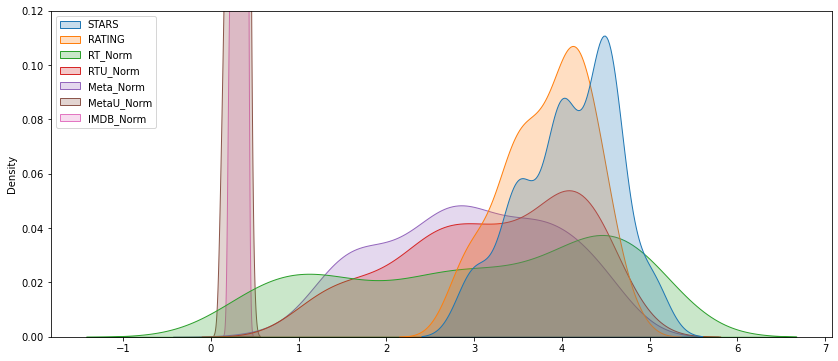

In [251]:
plt.figure(figsize=(14,6))
ax = sns.kdeplot(data=norm_scores, shade=True)
sns.move_legend(ax, 'upper left')
plt.ylim(0,0.12)

## Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme. Comparons directement ces deux-là.

<AxesSubplot:ylabel='Density'>

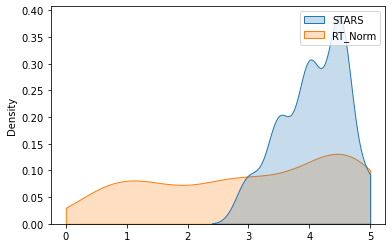

In [254]:
norm1 = pd.concat([norm_scores['STARS'],norm_scores['RT_Norm']], axis=1)
sns.kdeplot(data=norm1, shade=True, clip=(0,5))

 ## Un histogramme comparant toutes les notes normalisées

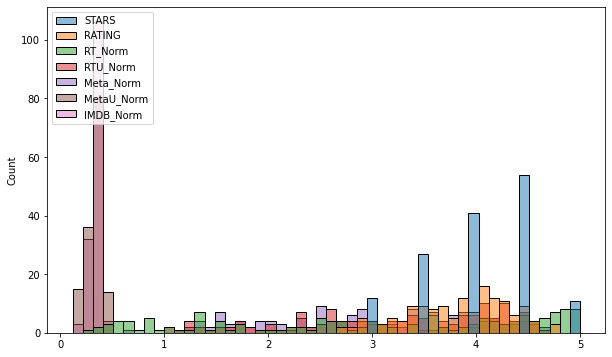

In [260]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=norm_scores,bins=50)
sns.move_legend(ax,'upper left')

### Comment sont évalués les pires films sur toutes les plateformes ?

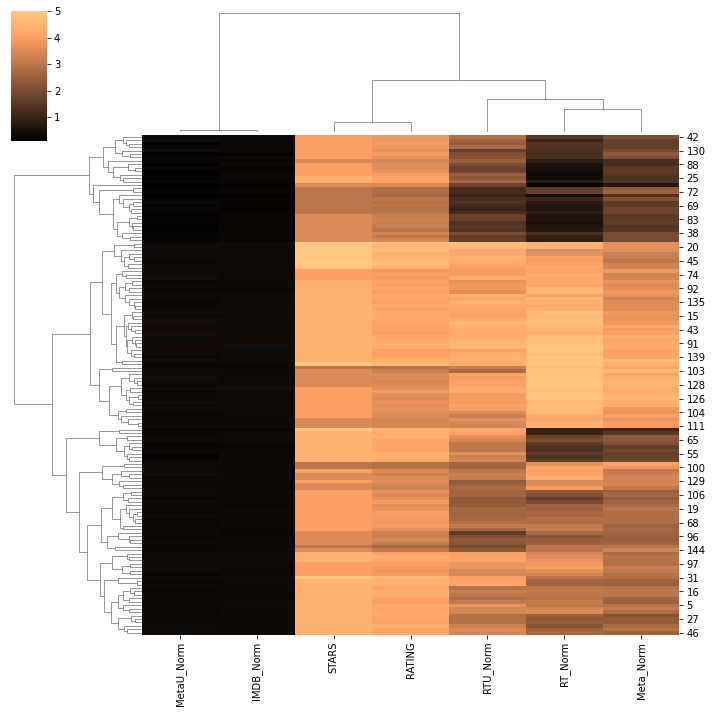

In [265]:
sns.clustermap(norm_scores, cmap = 'copper', row_cluster=True, col_cluster=True)
plt.show()

Il est clair que Fandango note les films de façon beaucoup plus généreuse que les autres plateformes, surtout si l'on considère qu'il affiche alors une version arrondie de sa note. Examinons le top 10 des pires films. Sur la base des évaluations des critiques de Rotten Tomatoes, quels sont les 10 films les moins bien notés ? Quels sont les scores normalisés sur toutes les plateformes pour ces films ? 

In [266]:
df.head(2)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,0.16,0.21
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,0.35,0.36


In [271]:
df.sort_values(by='RottenTomatoes',ascending=True).head(10).loc[:,['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm','FILM']]

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.25,1.80,0.65,0.12,0.21,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.35,2.45,1.40,0.16,0.30,Hitman: Agent 47 (2015)
54,4.0,3.7,0.40,1.85,1.55,0.18,0.25,Hot Pursuit (2015)
25,4.5,4.1,0.45,2.30,1.30,0.23,0.30,Taken 3 (2015)
28,3.0,2.7,0.45,1.00,1.35,0.12,0.20,Fantastic Four (2015)
50,4.0,3.6,0.50,1.75,1.50,0.28,0.23,The Boy Next Door (2015)
88,4.0,3.6,0.55,2.00,1.20,0.12,0.32,The Loft (2015)
87,3.5,3.2,0.55,1.35,1.60,0.19,0.27,Unfinished Business (2015)
78,3.5,3.2,0.60,1.50,1.35,0.16,0.28,Mortdecai (2015)
77,3.5,3.2,0.60,1.75,1.50,0.20,0.28,Seventh Son (2015)


## Visualisation de la distribution des notes sur toutes les plateformes pour les 10 films les plus mal notés par les critiques de RT

In [272]:
df1 = df.sort_values(by='RottenTomatoes',ascending=True).head(10).loc[:,['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm','FILM']]

<AxesSubplot:ylabel='Density'>

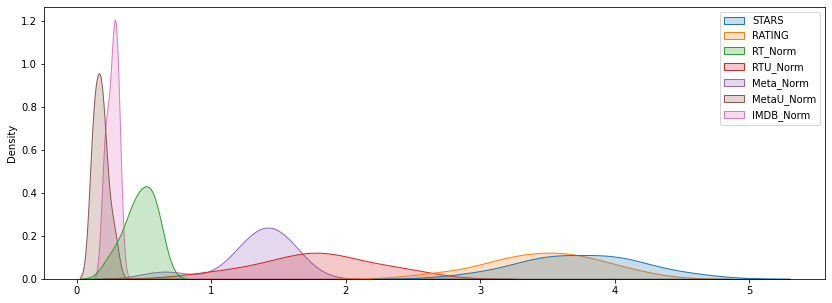

In [275]:
plt.figure(figsize=(14,5))
sns.kdeplot(data=df1, shade=True)

Réflexions finales : Wow ! Fandango affiche environ 3 à 4 étoiles pour des films clairement mauvais ! Remarquez le plus grand escroc : [Taken 3 !](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango affiche 4,5 étoiles sur son site pour un film avec une [note moyenne de 1,86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) sur les autres plateformes !

In [281]:
df1.loc[df1['RATING'] == 4.1,:]

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
25,4.5,4.1,0.45,2.3,1.3,0.23,0.3,Taken 3 (2015)


### Copyright 01-09-2023  by Mioty Sahaza 

## ALL RIGHT RESERVED